# 1.

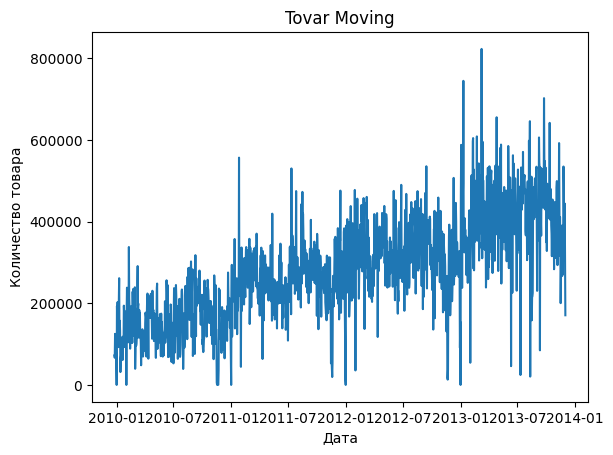

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
import statsmodels.api as sm

from datetime import datetime

df = pd.read_csv("data/tovar_moving.csv",  index_col=['date'], parse_dates=['date'], dayfirst=False)
df = df.asfreq('D')

df_test = df.tail(1)
df_train = df.head(len(df)-1)

plt.xlabel('Дата')
plt.ylabel('Количество товара')
plt.title('Tovar Moving')

plt.plot(df_train)

# 2.

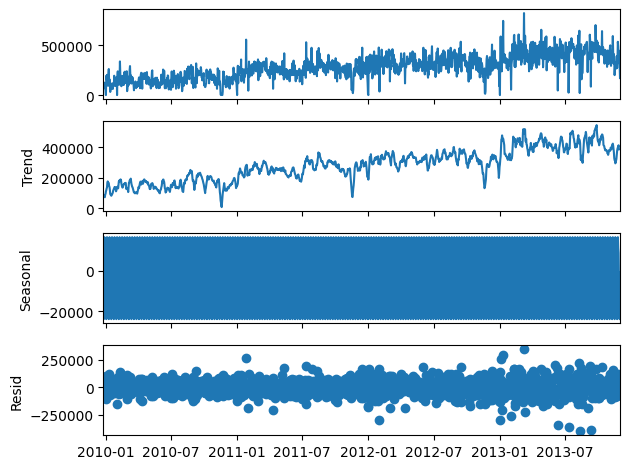

In [ ]:
decomposition = seasonal_decompose(df_train)
fig = decomposition.plot()
plt.show()

## Сезонная декомпозиция за последний год

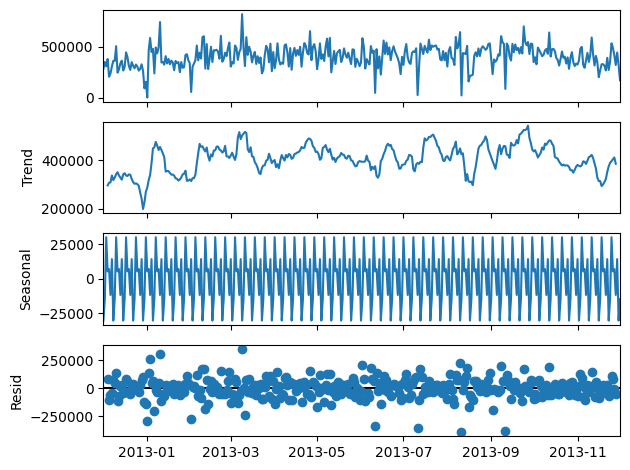

In [ ]:
df_last_year = df_train.loc[df_train.index >= df_train.index[-1] - pd.DateOffset(years=1)]
df_last_month = df_train.loc[df_train.index >= df_train.index[-1] - pd.DateOffset(months=1)]
decomposition = seasonal_decompose(df_last_year)
decomposition.plot()
plt.show()

## Сезонная декомпозиция за последний месяц

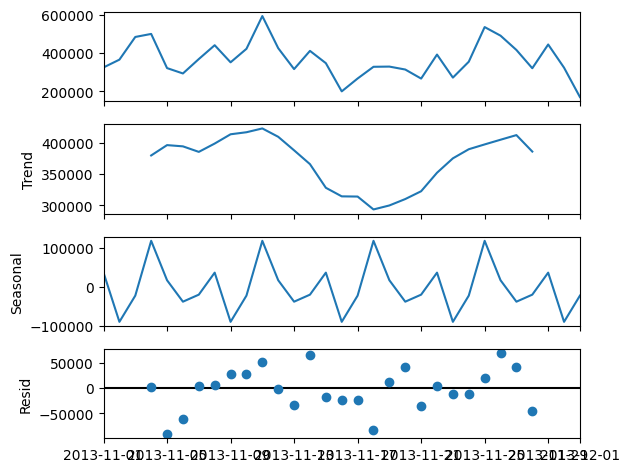

In [ ]:
df_last_month = df_train.loc[df_train.index >= df_train.index[-1] - pd.DateOffset(months=1)]
decomposition = seasonal_decompose(df_last_month)
decomposition.plot()
plt.show()

## Анализ тренда

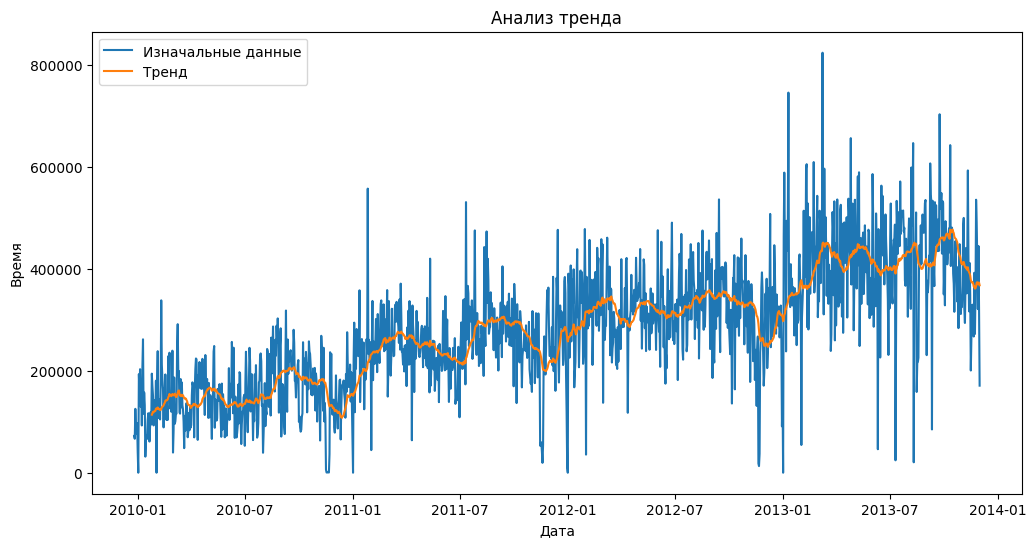

In [ ]:
rolling_mean = df_train.rolling(window=31).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_train, label='Изначальные данные')
plt.plot(rolling_mean, label='Тренд')
plt.xlabel('Дата')
plt.ylabel('Время')
plt.title('Анализ тренда')
plt.legend()
plt.show()

## Вывод
Во временном ряде присутствует как сезонность, так и тренд.

# 3.

In [1]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(df_train)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
forecast = model.forecast(1)
print("Forecast: {:.1f}".format(forecast.iloc[0]))
print("Actual: ", df_test.iloc[0].iloc[0])

NameError: name 'df_train' is not defined

# 4.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(df):
    result = adfuller(df)
    # print ('adf: ', result[0])
    # print ('p-value: ', result[1])
    # print ('Critical values: ', result[4])
    if result[0] > result[4]['5%']:
        return False
    else:
        return True

test = df
order = 0
while not is_stationary(test):
    test = test.diff().dropna()
    order += 1

print(f"Интегрированный ряд {order} порядка.")

Интегрированный ряд 1 порядка.


# 5.

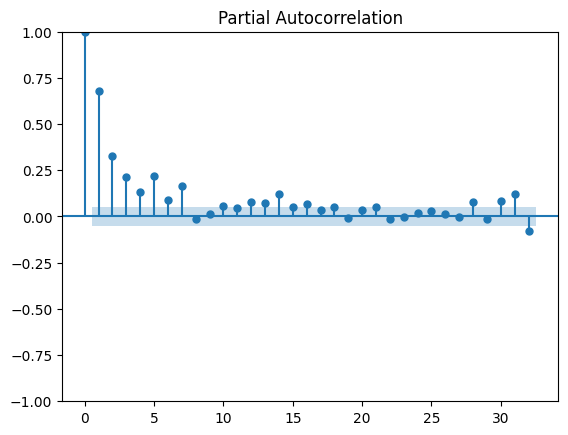

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)
plt.show()

# 6.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(df_train, lags=7).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(7)   Log Likelihood              -18187.904
Method:               Conditional MLE   S.D. of innovations          80096.504
Date:                Tue, 28 May 2024   AIC                          36393.808
Time:                        12:45:08   BIC                          36441.203
Sample:                    01-01-2010   HQIC                         36411.506
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.606e+04   6125.181      4.254      0.000    1.41e+04    3.81e+04
qty.L1         0.2917      0.026     11.169      0.000       0.241       0.343
qty.L2         0.1248      0.027      4.585      0.0

# 7.

In [ ]:
pred = ar_model.predict(start=len(df_train), end=(len(df)-1), dynamic=False)
print(pred)

2013-12-02    345269.605384
Freq: D, dtype: float64
